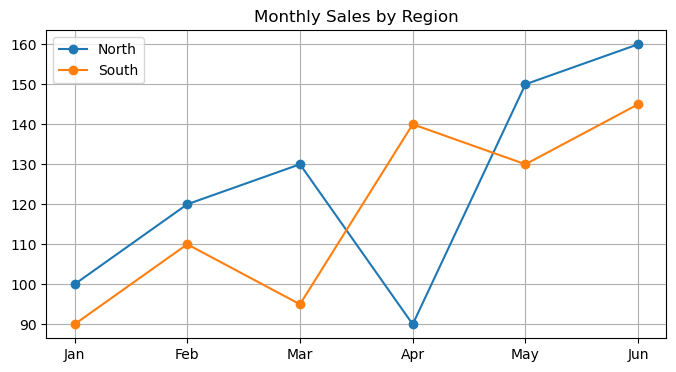

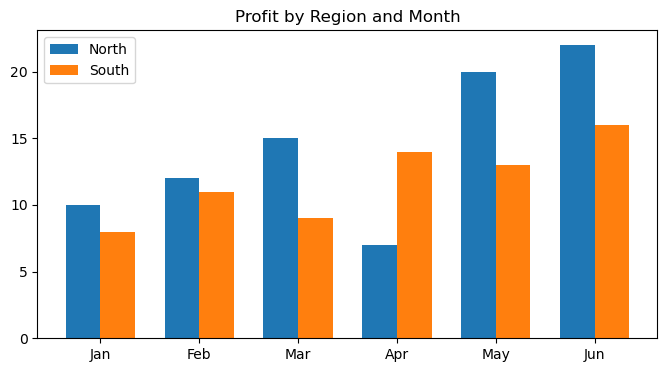

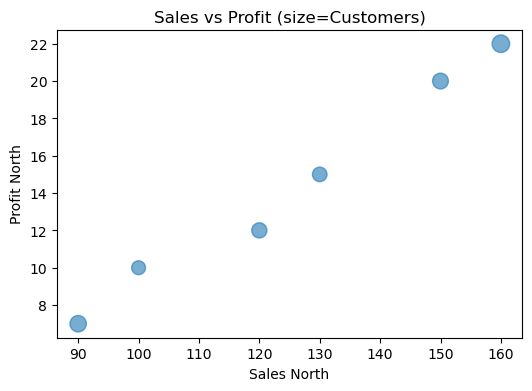

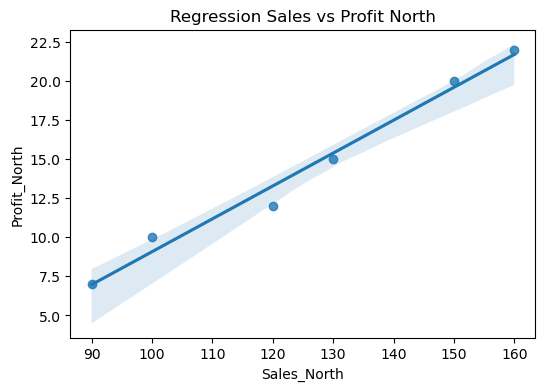

In [1]:
# Section A
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Sample sales_data with months & two regions
df = pd.DataFrame({
    'Month': ['Jan','Feb','Mar','Apr','May','Jun'],
    'Sales_North':[100,120,130,90,150,160],
    'Sales_South':[90,110,95,140,130,145],
    'Profit_North':[10,12,15,7,20,22],
    'Profit_South':[8,11,9,14,13,16],
    'Customers':[50,60,55,70,65,80]
})

# 1. Line chart monthly sales both regions
plt.figure(figsize=(8,4))
plt.plot(df['Month'], df['Sales_North'], marker='o', label='North')
plt.plot(df['Month'], df['Sales_South'], marker='o', label='South')
plt.legend(); plt.grid(True); plt.title('Monthly Sales by Region'); plt.show()

# 2. Grouped bar chart comparing Profit for each Region across months
x = np.arange(len(df['Month']))
width = 0.35
plt.figure(figsize=(8,4))
plt.bar(x - width/2, df['Profit_North'], width, label='North')
plt.bar(x + width/2, df['Profit_South'], width, label='South')
plt.xticks(x, df['Month']); plt.legend(); plt.title('Profit by Region and Month'); plt.show()

# 3. Scatter Sales vs Profit, marker size = Customers
plt.figure(figsize=(6,4))
plt.scatter(df['Sales_North'], df['Profit_North'], s=df['Customers']*2, alpha=0.6)
plt.xlabel('Sales North'); plt.ylabel('Profit North'); plt.title('Sales vs Profit (size=Customers)'); plt.show()

# 4. Scatter with regression line per region (use seaborn)
plt.figure(figsize=(6,4))
sns.regplot(x='Sales_North', y='Profit_North', data=df)
plt.title('Regression Sales vs Profit North'); plt.show()
# Interpretation: slope indicates whether higher sales associate with higher profit.


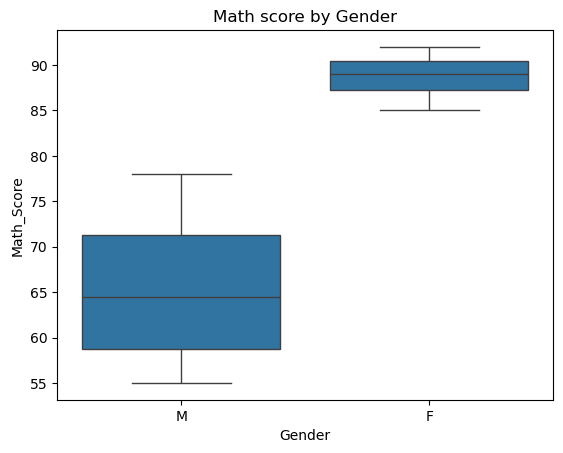

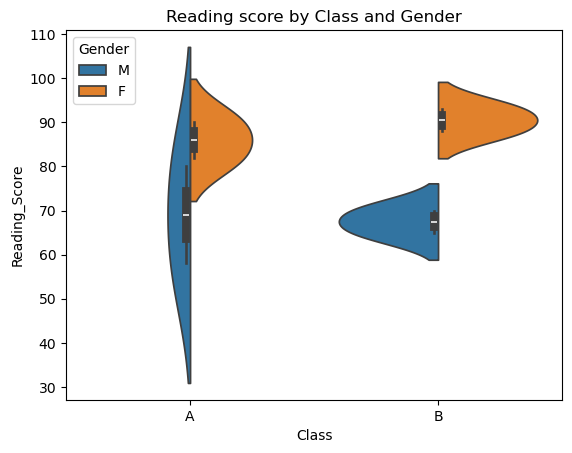

<Figure size 640x480 with 0 Axes>

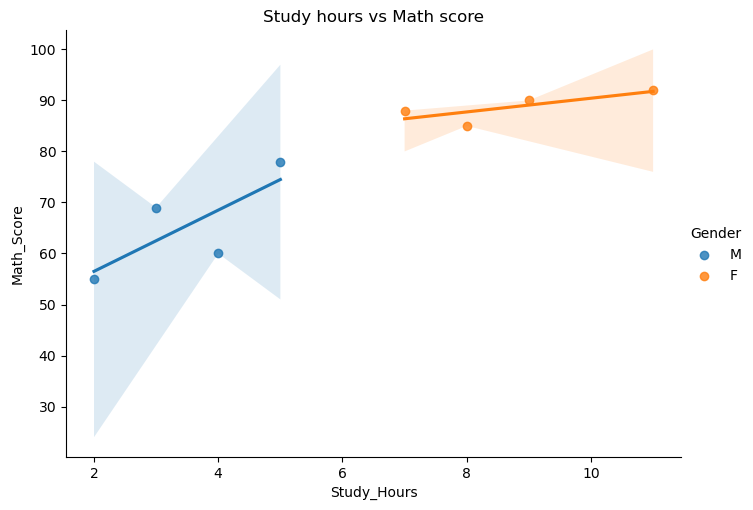

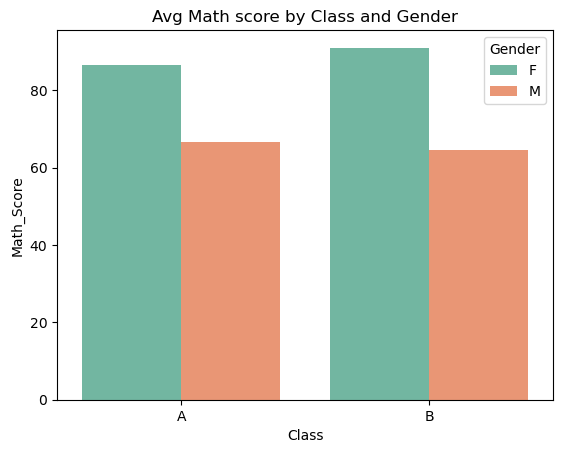

Mean Math by Gender:
 Gender
F    88.75
M    65.50
Name: Math_Score, dtype: float64


In [2]:
# Section B
# Example dataset
df = pd.DataFrame({
    'Gender':['M','F','M','F','M','F','F','M'],
    'Math_Score':[78,85,69,90,55,92,88,60],
    'Reading_Score':[80,82,70,93,58,88,90,65],
    'Class':['A','A','B','B','A','B','A','B']
})

# 1. Boxplot Math_Score by Gender
plt.figure(); sns.boxplot(x='Gender', y='Math_Score', data=df); plt.title('Math score by Gender'); plt.show()

# 2. Violin plot reading_score across class groups colored by gender
plt.figure(); sns.violinplot(x='Class', y='Reading_Score', hue='Gender', data=df, split=True); plt.title('Reading score by Class and Gender'); plt.show()

# 3. Scatter Study_Hours vs Math_Score with regression & hue Gender (create Study_Hours)
df['Study_Hours'] = [5,8,3,9,2,11,7,4]
plt.figure(); sns.lmplot(x='Study_Hours', y='Math_Score', hue='Gender', data=df, aspect=1.4); plt.title('Study hours vs Math score'); plt.show()

# 4. Grouped bar avg Math_Score by Class and Gender
avg = df.groupby(['Class','Gender'])['Math_Score'].mean().reset_index()
plt.figure(); sns.barplot(x='Class', y='Math_Score', hue='Gender', data=avg, palette='Set2'); plt.title('Avg Math score by Class and Gender'); plt.show()

# 5. Interpretation: check means (print)
print("Mean Math by Gender:\n", df.groupby('Gender')['Math_Score'].mean())


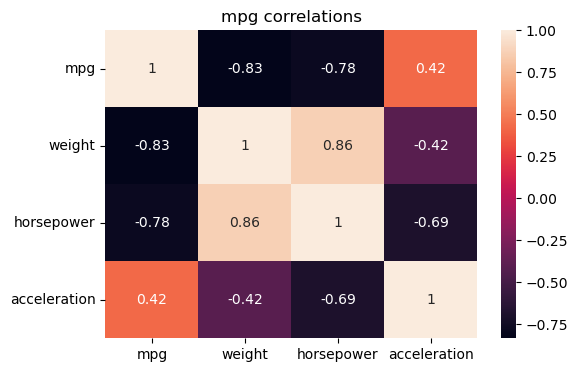

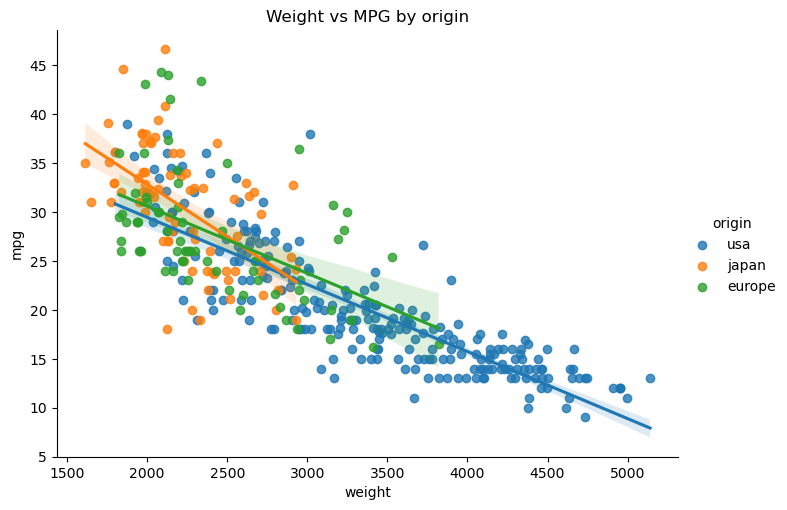

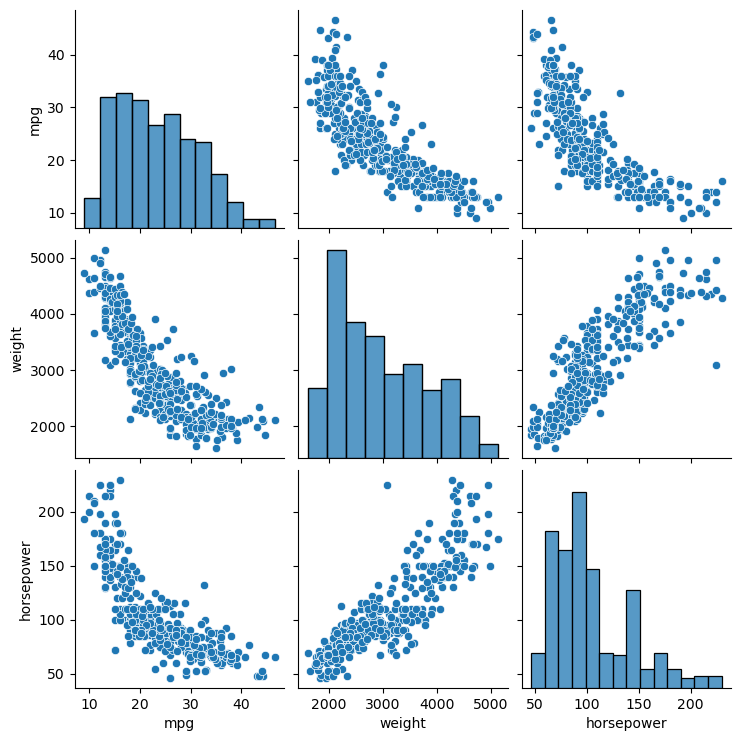

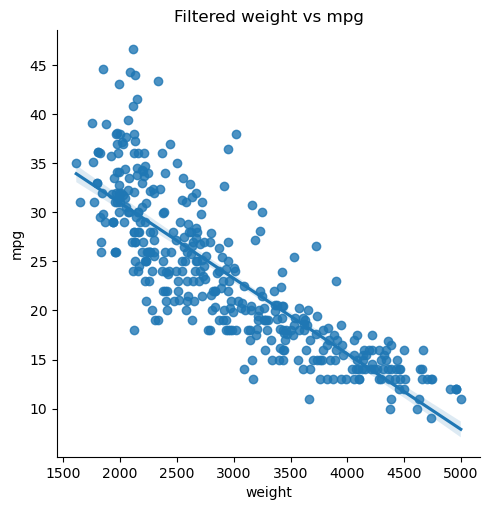

Correlation weight vs mpg: -0.8322442148315754


In [3]:
# Section C: use seaborn's mpg dataset
mpg = sns.load_dataset('mpg').dropna()
# 1. Correlation heatmap
plt.figure(figsize=(6,4)); sns.heatmap(mpg[['mpg','weight','horsepower','acceleration']].corr(), annot=True); plt.title('mpg correlations'); plt.show()

# 2. Regression line between weight and mpg with hue origin
sns.lmplot(x='weight', y='mpg', hue='origin', data=mpg, height=5, aspect=1.4); plt.title('Weight vs MPG by origin'); plt.show()

# 3. Pairplot for mpg, weight, horsepower
sns.pairplot(mpg[['mpg','weight','horsepower']]); plt.show()

# 4. Filter mpg < 50 and weight < 5000 then lmplot
mpg_filtered = mpg[(mpg['mpg'] < 50) & (mpg['weight'] < 5000)]
sns.lmplot(x='weight', y='mpg', data=mpg_filtered); plt.title('Filtered weight vs mpg'); plt.show()

# 5. Interpretation (print)
print("Correlation weight vs mpg:", mpg['weight'].corr(mpg['mpg']))
# Heavier cars typically show lower mpg (negative correlation).


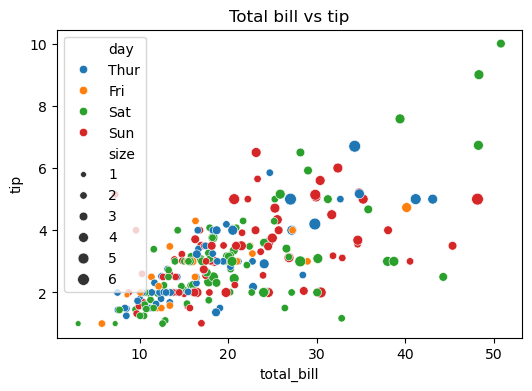

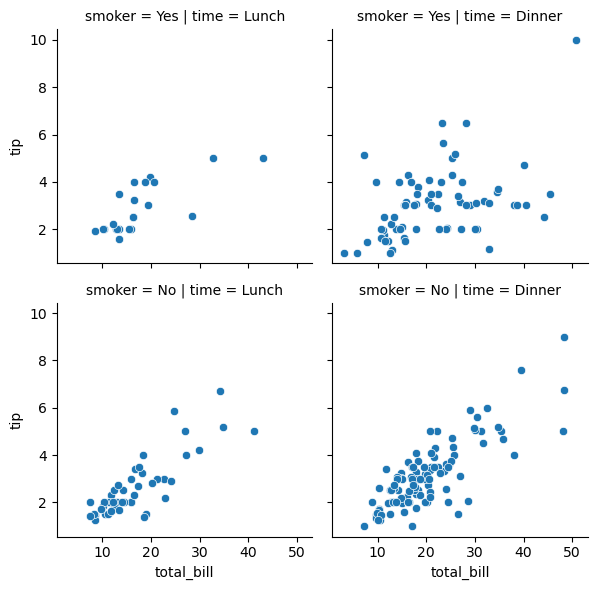

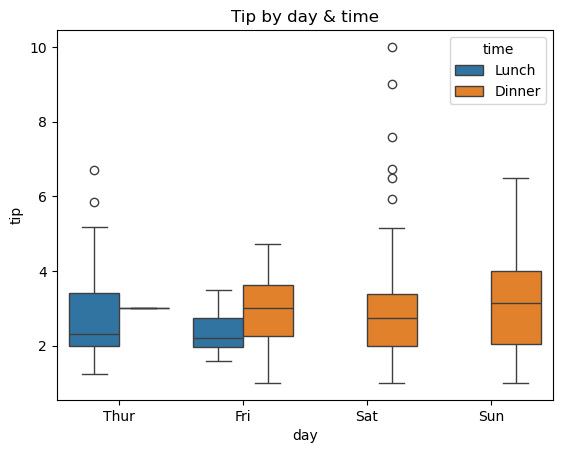

In [4]:
# Section D
tips = sns.load_dataset('tips')

# 1. Scatter: total_bill vs tip, day by color, size=party size
plt.figure(figsize=(6,4)); sns.scatterplot(x='total_bill', y='tip', hue='day', size='size', data=tips); plt.title('Total bill vs tip'); plt.show()

# 2. FacetGrid scatter by time and smoker
g = sns.FacetGrid(tips, col='time', row='smoker'); g.map_dataframe(sns.scatterplot, 'total_bill', 'tip'); g.add_legend(); plt.show()

# 3. Boxplot tip by day with hue time
plt.figure(); sns.boxplot(x='day', y='tip', hue='time', data=tips); plt.title('Tip by day & time'); plt.show()

# 4. Interpretation: color is better for categorical grouping (distinct hues), size useful to encode magnitude but less precise for comparisons.


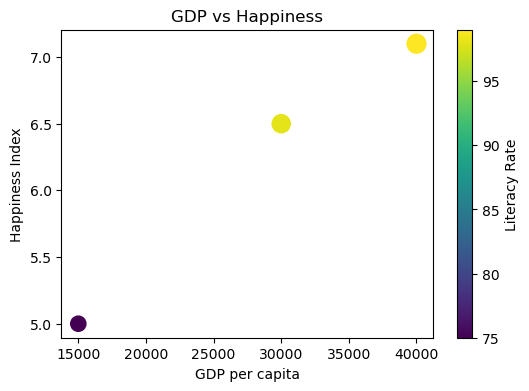

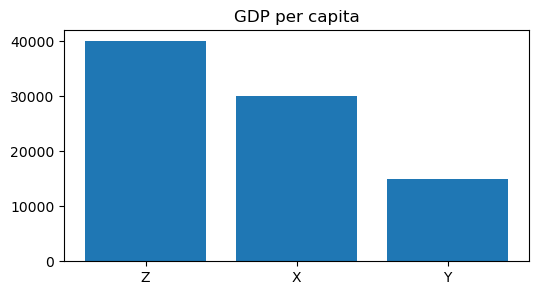

Corr GDP vs Happiness: 0.9918697838003709
Corr Internet users vs Happiness: 0.9974484981128627


In [5]:
# Section E
country_data = pd.DataFrame({
    'Country':['X','Y','Z'],
    'GDP_per_capita':[30000, 15000, 40000],
    'Happiness_Index':[6.5, 5.0, 7.1],
    'Internet_Users':[85, 60, 92],
    'Literacy_Rate':[98, 75, 99]
})

# 1. Scatter: GDP vs Happiness, size=Internet_Users, color=Literacy
plt.figure(figsize=(6,4))
plt.scatter(country_data['GDP_per_capita'], country_data['Happiness_Index'],
            s=country_data['Internet_Users']*2, c=country_data['Literacy_Rate'], cmap='viridis')
plt.colorbar(label='Literacy Rate')
plt.xlabel('GDP per capita'); plt.ylabel('Happiness Index'); plt.title('GDP vs Happiness'); plt.show()

# 2. Bar chart GDP per country sorted
country_data_sorted = country_data.sort_values('GDP_per_capita', ascending=False)
plt.figure(figsize=(6,3)); plt.bar(country_data_sorted['Country'], country_data_sorted['GDP_per_capita']); plt.title('GDP per capita'); plt.show()

# 3. Observations: compute simple correlations
print("Corr GDP vs Happiness:", country_data['GDP_per_capita'].corr(country_data['Happiness_Index']))
print("Corr Internet users vs Happiness:", country_data['Internet_Users'].corr(country_data['Happiness_Index']))

# 4. Suggested improvements: label axes, add errorbars or population weighting, use colorblind-safe palette, add short caption.


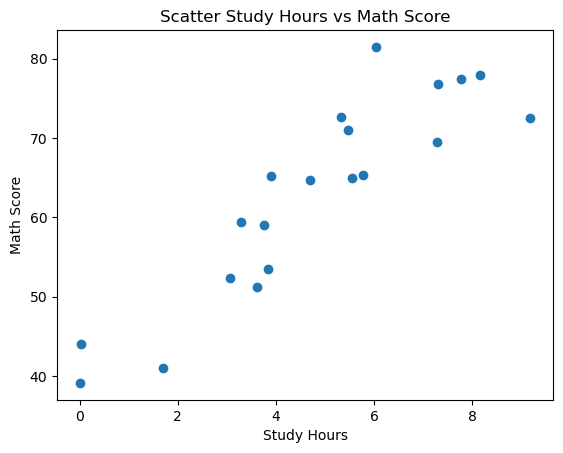

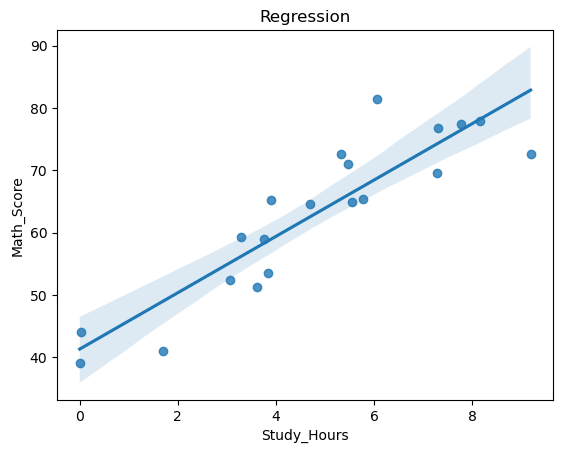

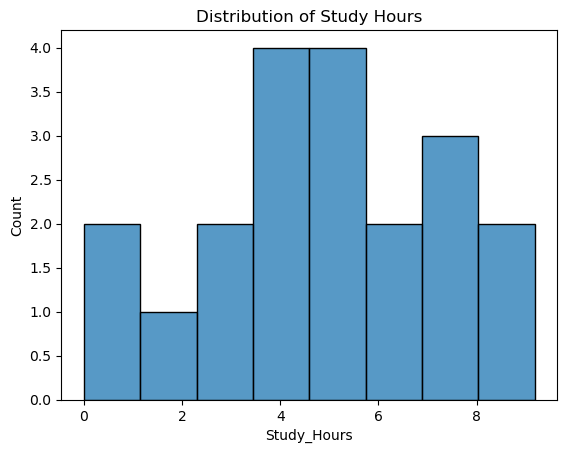

Interpretation: Positive slope in regression indicates more study hours associate with higher Math scores.


In [6]:
# Section F: mini project sample: Does study hours impact Math score?
df = pd.DataFrame({
    'Student_ID': range(1,21),
    'Study_Hours': np.random.normal(5,2,20).clip(0,12),
    'Math_Score': np.random.normal(60,12,20)
})
# Let's simulate a positive relation
df['Math_Score'] = (df['Study_Hours'] * 5) + np.random.normal(40,8,20)

# Three visualizations
import matplotlib.pyplot as plt
plt.figure(); plt.scatter(df['Study_Hours'], df['Math_Score']); plt.xlabel('Study Hours'); plt.ylabel('Math Score'); plt.title('Scatter Study Hours vs Math Score'); plt.show()

plt.figure(); sns.regplot(x='Study_Hours', y='Math_Score', data=df); plt.title('Regression'); plt.show()

plt.figure(); sns.histplot(df['Study_Hours'], bins=8); plt.title('Distribution of Study Hours'); plt.show()

# Interpretations:
print("Interpretation: Positive slope in regression indicates more study hours associate with higher Math scores.")
